<a href="https://colab.research.google.com/github/pranjul6386/Age_gender_emotion/blob/main/UTK_gender_age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip "/content/drive/MyDrive/Datasets/utk_facial.zip"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import numpy as np
import PIL
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [5]:
img=PIL.Image.open("/content/utkface_aligned_cropped/crop_part1/10_0_0_20170104013211746.jpg.chip.jpg")
h,w=img.size
print(h,w)

200 200


In [6]:
img=PIL.Image.open("/content/utkface_aligned_cropped/UTKFace/100_1_0_20170112213001988.jpg.chip.jpg")
h,w=img.size
print(h,w)

200 200


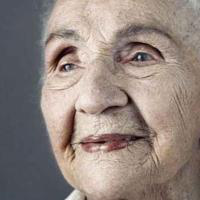

In [7]:
img

In [8]:
input_dir="/content/utkface_aligned_cropped/UTKFace"


In [ ]:
ages=[]
genders=[]
images=[]
for file in os.listdir(input_dir):
  age = int(file.split('_')[0])
  ages.append(age)
  gender=int(file.split('_')[1])
  genders.append(gender)
  path=input_dir+ "/"+file
  print(path)
  
  image=cv2.imread(path)
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image=cv2.resize(image,(48,48))
  images.append(image)

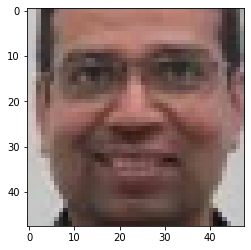

In [11]:
plt.imshow(images[876])

In [12]:
print(ages[876])

38


In [13]:
print(len(ages))
print(len(images))
print(len(genders))

23708
23708
23708


In [14]:
images_array = np.array(images)
ages_array = np.array(ages)
genders_array = np.array(genders)

In [15]:
values, counts=np.unique(genders_array,return_counts=True)
print(counts)

[12391 11317]


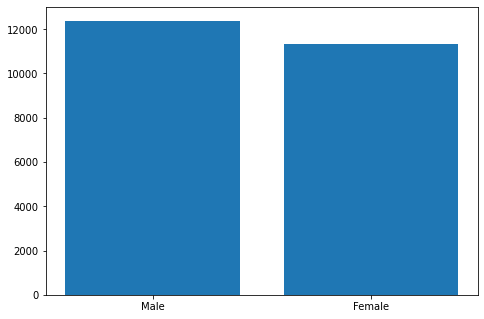

In [16]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values =[12391, 11317]
ax.bar(gender,values)
plt.show()

In [17]:
values, counts=np.unique(ages_array,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [18]:
val = values.tolist()
cnt = counts.tolist()

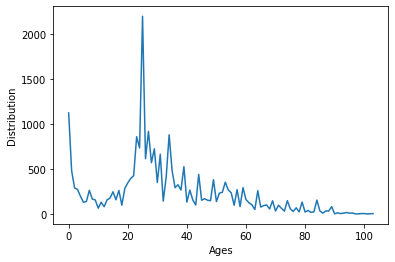

In [19]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [20]:
labels =[]
i=0
while(i<len(ages)):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [23]:
labels[:6]

[[8, 1], [12, 1], [25, 1], [36, 1], [39, 0], [27, 1]]

In [22]:
len(labels)

23708

In [24]:
images_array=images_array/255

In [25]:
images_array.shape

(23708, 48, 48, 3)

In [28]:
label_array=np.array(labels)

In [30]:
label_array.shape

(23708, 2)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images_array,label_array,test_size=0.20)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(18966, 48, 48, 3)
(4742, 48, 48, 3)
(18966, 2)
(4742, 2)


In [34]:
y_train[0:5]

array([[49,  0],
       [26,  0],
       [25,  1],
       [40,  0],
       [24,  1]])

In [35]:
y_train_2 = [y_train[:,1], y_train[:,0]]
y_test_2 = [y_test[:,1],y_test[:,0]]

In [36]:
y_train_2

[array([0, 0, 1, ..., 1, 0, 0]), array([49, 26, 25, ..., 24,  1,  1])]

In [37]:
y_test_2

[array([1, 0, 0, ..., 1, 1, 1]), array([30, 18, 24, ...,  1, 28, 72])]

In [38]:
y_train_2[0][0:5]

array([0, 0, 1, 0, 1])

In [39]:
y_train_2[1][0:5]

array([49, 26, 25, 40, 24])

In [40]:
def Convolution(input_tensor, filters):
    x=Conv2D(filters=filters, kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [45]:
def model(input_shape):
  input=Input((input_shape))
  conv1=Convolution(input,32)
  pool1=MaxPool2D(pool_size=(2,2))(conv1)

  conv2=Convolution(pool1,64)
  pool2=MaxPool2D(pool_size=(2,2))(conv2)

  conv3=Convolution(pool2,128)
  pool3=MaxPool2D(pool_size=(2,2))(conv3)

  conv4=Convolution(pool3,256)
  pool4=MaxPool2D(pool_size=(2,2))(conv4)

  flatten=Flatten()(pool4)
  dense1=Dense(64,activation="relu")(flatten)
  dense2=Dense(64,activation="relu")(flatten)

  drop_1 = Dropout(0.2)(dense1)
  drop_2 = Dropout(0.2)(dense2)

  output1=Dense(1,activation="sigmoid",name="gender_out")(drop_1)
  output2=Dense(1,activation="relu",name="age_out")(drop_2)

  model = Model(inputs=[input], outputs=[output1,output2])
  model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
  return model




In [46]:
Model = model((48,48,3))

In [47]:
from tensorflow.keras.callbacks import ModelCheckpoint
file_path="/content/age_gender_detection.h5"
checkpoint = ModelCheckpoint(file_path,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop = tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights=True)
callback_list=[checkpoint,Early_stop]

In [48]:
History = Model.fit(x_train,y_train_2,batch_size=64,validation_data=(x_test,y_test_2),epochs=250, callbacks=callback_list)

Epoch 1/250
297/297 [==============================] - 165s 549ms/step - loss: 16.8572 - gender_out_loss: 0.6912 - age_out_loss: 15.9828 - gender_out_accuracy: 0.5273 - age_out_accuracy: 0.0471 - val_loss: 16.9282 - val_gender_out_loss: 0.6791 - val_age_out_loss: 16.0903 - val_gender_out_accuracy: 0.5639 - val_age_out_accuracy: 0.0485

Epoch 00001: val_loss improved from inf to 16.92817, saving model to /content/age_gender_detection.h5
Epoch 2/250
297/297 [==============================] - 163s 549ms/step - loss: 13.0733 - gender_out_loss: 0.6181 - age_out_loss: 12.2655 - gender_out_accuracy: 0.6448 - age_out_accuracy: 0.0417 - val_loss: 11.6825 - val_gender_out_loss: 0.5810 - val_age_out_loss: 10.8817 - val_gender_out_accuracy: 0.7337 - val_age_out_accuracy: 0.0314

Epoch 00002: val_loss improved from 16.92817 to 11.68251, saving model to /content/age_gender_detection.h5
Epoch 3/250
297/297 [==============================] - 163s 548ms/step - loss: 10.8119 - gender_out_loss: 0.5523 - 

In [51]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 48, 48, 32)   896         input_3[0][0]                    
__________________________________________________________________________________________________
dropout_8 (Dropout)             (None, 48, 48, 32)   0           conv2d_8[0][0]                   
__________________________________________________________________________________________________
activation_8 (Activation)       (None, 48, 48, 32)   0           dropout_8[0][0]                  
______________________________________________________________________________________________

In [52]:
Model.evaluate(x_test,y_test_2)

149/149 [==============================] - 9s 58ms/step - loss: 7.3761 - gender_out_loss: 0.2724 - age_out_loss: 6.3833 - gender_out_accuracy: 0.8775 - age_out_accuracy: 0.0485


[7.37612771987915,
 0.2723798453807831,
 6.383285045623779,
 0.8774778842926025,
 0.04850274324417114]

In [53]:
pred = Model.predict(x_test)
pred[1]

array([[36.249588 ],
       [24.915112 ],
       [30.504345 ],
       ...,
       [ 1.2107931],
       [19.199955 ],
       [43.466156 ]], dtype=float32)

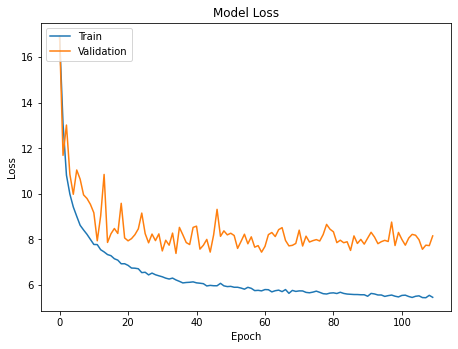

In [54]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

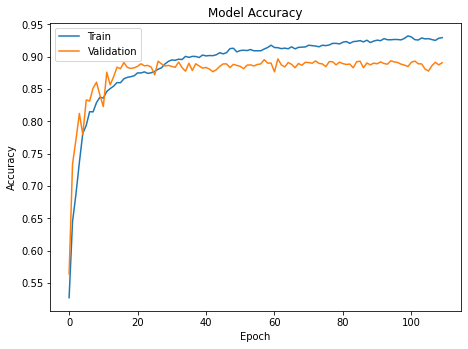

In [57]:
plt.plot(History.history['gender_out_accuracy'])
plt.plot(History.history['val_gender_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

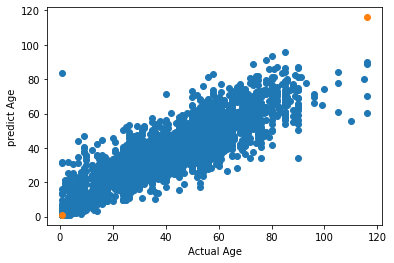

In [58]:
fig,ax=plt.subplots()
ax.scatter(y_test_2[1],pred[1])
ax.scatter([y_test_2[1].min(),y_test_2[1].max()],[y_test_2[1].min(),y_test_2[1].max()])
ax.set_xlabel('Actual Age')
ax.set_ylabel('predict Age')
plt.show()

In [59]:
i=0
Pred_d=[]
while(i<len(pred[0])):
    Pred_d.append(int(np.round(pred[0][i])))
    i=i+1

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
report = classification_report(y_test_2[0],Pred_d)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2504
           1       0.92      0.81      0.86      2238

    accuracy                           0.88      4742
   macro avg       0.88      0.87      0.88      4742
weighted avg       0.88      0.88      0.88      4742



In [61]:
results = confusion_matrix(y_test_2[0],Pred_d)


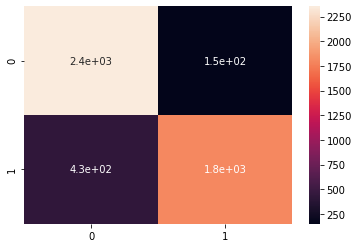

In [62]:
import seaborn as sns
sns.heatmap(results,annot=True)

In [63]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l= Model.predict(np.array([image_test]))
    gender_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    gender=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ gender_f[gender])